# Caltech Machine Learning Homework # 1

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Instructions: https://work.caltech.edu/homework/hw1.pdf

Answers: http://work.caltech.edu/homework/hw1_sol.pdf

## The Learning Problem

### 1. What types of Machine Learning, if any, best describe the following three scenarios: 

(i) A coin classification system is created for a vending machine. The developers obtain exact coin specifications from the U.S. Mint and derive
a statistical model of the size, weight, and denomination, which the vending machine then uses to classify coins.

(ii) Instead of calling the U.S. Mint to obtain coin information, an algorithm is
presented with a large set of labeled coins. The algorithm uses this data to
infer decision boundaries which the vending machine then uses to classify
its coins.

(iii) A computer develops a strategy for playing Tic-Tac-Toe by playing repeatedly and adjusting its strategy by penalizing moves that eventually lead
to losing.

---

[a] (i) Supervised Learning, (ii) Unsupervised Learning, (iii) Reinforcement
Learning

[b] (i) Supervised Learning, (ii) Not learning, (iii) Unsupervised Learning

[c] (i) Not learning, (ii) Reinforcement Learning, (iii) Supervised Learning

[d] (i) Not learning, (ii) Supervised Learning, (iii) Reinforcement Learning

[e] (i) Supervised Learning, (ii) Reinforcement Learning, (iii) Unsupervised
Learning

**My answer:**

 <font color='green'>d</font>

### 2. Which of the following problems are best suited for Machine Learning?

(i) Classifying numbers into primes and non-primes.

(ii) Detecting potential fraud in credit card charges.

(iii) Determining the time it would take a falling object to hit the ground.

(iv) Determining the optimal cycle for traffic lights in a busy intersection.

---

[a] (ii) and (iv)

[b] (i) and (ii)

[c] (i), (ii), and (iii)

[d] (iii)

[e] (i) and (iii)

**My answer:**

 <font color='green'>a</font>

## Bins and Marbles

### 3. We have 2 opaque bags, each containing 2 balls. 
One bag has 2 black balls and the other has a black ball and a white ball. 
You pick a bag at random and then pick one of the balls in that bag at random.
When you look at the ball, it is black. You now pick the second ball from that same bag. What is the
probability that this ball is also black?


[a] 1/4

[b] 1/3

[c] 1/2

[d] 2/3

[e] 3/4

**My answer:**

P("Black ball at start") = 0.75

P("White ball at start") = 0.25

P("Black ball after having picked one black") = 2/3
 
 <font color='green'>d</font>

---

Consider a sample of 10 marbles drawn from a bin containing red and green marbles.

The probability that any marble we draw is red is µ = 0.55 (independently, with
replacement). 

We address the probability of getting no red marbles (ν = 0) in the
following cases:

### 4. We draw only one such sample.
Compute the probability that ν = 0. The closest answer is (‘closest answer’ means: `|your answer−given option|` is closest to 0):
    
[a] 7.331 × 10−6

[b] 3.405 × 10−4

[c] 0.289

[d] 0.450

[e] 0.550

**My answer:**

In [1]:
p_greenMarble = 0.45
p_tenGreenMarbles = p_greenMarble ** 10

p_tenGreenMarbles

0.00034050628916015635

 <font color='green'>b</font>

### 5. We draw 1,000 independent samples. 
Compute the probability that (at least) one of the samples has ν = 0. The closest answer is:
    
[a] 7.331 × 10−6

[b] 3.405 × 10−4

[c] 0.289

[d] 0.450

[e] 0.550


**My answer:**

P("At least one sample has ν = 0") = 1 - P("No sample has ν = 0")

In [2]:
N = 1000
p_oneSampleHasNu0 = p_tenGreenMarbles
p_noSampleHasNu0 = (1-p_oneSampleHasNu0) ** N
p_atLeastOneSampleHasNu0 = 1 - p_noSampleHasNu0

p_atLeastOneSampleHasNu0

0.28863119784980995

 <font color='green'>c</font>

## Feasibility of Learning

![Feasibility of Learning](imgs/feasibility_of_learning.png)

### 6. Which hypothesis g agrees the most with the possible target functions in terms of the above score?

[a] g returns 1 for all three points.

[b] g returns 0 for all three points.

[c] g is the XOR function applied to x, i.e., if the number of 1s in x is odd, g
returns 1; if it is even, g returns 0.

[d] g returns the opposite of the XOR function: if the number of 1s is odd, it
returns 0, otherwise returns 1.

[e] They are all equivalent (equal scores for g in [a] through [d]).

**My answer:**

```
x6 = {1, 0, 1}
x7 = {1, 1, 0}
x8 = {1, 1, 1}

h1(x6, x7, x8) = {0, 0, 0}
h2(x6, x7, x8) = {0, 0, 1}
h3(x6, x7, x8) = {0, 1, 0}
h4(x6, x7, x8) = {0, 1, 1}
h5(x6, x7, x8) = {1, 0, 0}
h6(x6, x7, x8) = {1, 0, 1}
h7(x6, x7, x8) = {1, 1, 0}
h8(x6, x7, x8) = {1, 1, 1}
```

[a] 
g(x6, x7, x8) = {1, 1, 1}

In [3]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[b] 
g(x6, x7, x8) = {0, 0, 0}

In [4]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[c] 
g(x6, x7, x8) = XOR(x6, x7, x8) = {0, 0, 1}

In [5]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

 ...
 Looks like they're all equivalent!
 <font color='green'>e</font>

## The Perceptron Learning Algorithm

![PLA](imgs/pla.png)

In [3]:
def set_axis_cartesian():
    ax = plt.figure().add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

Random Point 1: [0.89080816 0.81023944]
Random Point 2: [0.52310647 0.22334591]
1.596113188980488
-0.6115912185129535


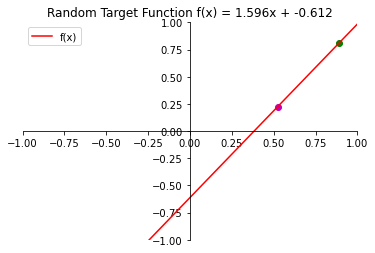

In [4]:
p1 = np.random.uniform(-1, 1, size=2)
p2 = np.random.uniform(-1, 1, size=2)

print('Random Point 1:', p1)
print('Random Point 2:', p2)

set_axis_cartesian()

plt.plot(p1[0], p1[1], 'go')
plt.plot(p2[0], p2[1], 'mo')

m = (p1[1] - p2[1]) / (p1[0] - p2[0])
print(m)

c = p1[1] - m*p1[0]
print(c)

x_axis = np.linspace(-1,1, 100)
y_axis = m*(x_axis)+c
plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

### 7. Take N = 10. 
How many iterations does it take on average for the PLA to converge for N = 10 training points?

Pick the value closest to your results
(again, ‘closest’ means: |your answer − given option| is closest to 0).

[a] 1

[b] 15

[c] 300

[d] 5000

[e] 10000

In [5]:
N = 10
x = np.random.uniform(-1, 1, size=(10,2))
x

array([[-0.83677557, -0.01585948],
       [-0.36117624,  0.89167283],
       [ 0.81609203, -0.1813286 ],
       [-0.54128061, -0.82937018],
       [ 0.06291545,  0.26474042],
       [-0.63508438, -0.7732417 ],
       [-0.83017917,  0.71548238],
       [ 0.46634765,  0.48647812],
       [-0.54589593, -0.25017974],
       [ 0.00791493,  0.79185954]])

With `a` and `b` the polynomial coefficients, the side of the line that a point "lands" on is given by

```
sign(ax+by-d)
```

![Illustration](https://i.stack.imgur.com/5H6z3.png)

...where we take being on the line exactly as 0, which will always be misclassified.

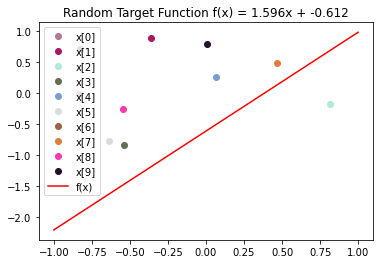

In [6]:
# ...and plot the points and the line


for i,randomPoint in enumerate(x):
    plt.plot( randomPoint[0], randomPoint[1], 'mo', label=f'x[{i}]', c=np.random.rand(3,) )
    

plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

```
y = mx + c
mx - y = -c

so to put it in the form ax + by = d
```




In [1]:
a = m
b = -1
d = -c
def y(x:np.ndarray):
    assert x.shape == (3,)
    return np.sign(a*x[1]+b*x[2]-d).astype(int)

NameError: name 'm' is not defined

Introducing bias

In [7]:
xWithBias = np.insert(x, 0, 1, axis=1)
xWithBias

array([[ 1.        , -0.83677557, -0.01585948],
       [ 1.        , -0.36117624,  0.89167283],
       [ 1.        ,  0.81609203, -0.1813286 ],
       [ 1.        , -0.54128061, -0.82937018],
       [ 1.        ,  0.06291545,  0.26474042],
       [ 1.        , -0.63508438, -0.7732417 ],
       [ 1.        , -0.83017917,  0.71548238],
       [ 1.        ,  0.46634765,  0.48647812],
       [ 1.        , -0.54589593, -0.25017974],
       [ 1.        ,  0.00791493,  0.79185954]])

In [8]:


print('Correct Classifications:')
for point in xWithBias:
    print(y(point))

Correct Classifications:
-1
-1
1
-1
-1
-1
-1
-1
-1
-1


In [31]:
# Initialize weights at zero
w = np.zeros(3)
w

array([0., 0., 0.])

In [32]:
sum0 = int(np.sign(w[0]*xWithBias[0][0]+w[1]*xWithBias[0][1]+w[2]*xWithBias[0][2]))
print(sum0)

mat0 = int(np.sign( np.dot( np.transpose(w), xWithBias[0] ) ))
print(mat0)

## Perceptron model
def h(point:np.ndarray,weights):
    assert point.shape == (3,)

    
    return np.sign( np.dot( np.transpose(weights), point ) ).astype(int)

0
0


In [34]:
# Initial application of perceptron model
for point in xWithBias:
    print(h(point, w))

0
0
0
0
0
0
0
0
0
0


![PLA](https://miro.medium.com/max/516/1*PbJBdf-WxR0Dd0xHvEoh4A.png)

![PLA From Course](imgs/pla2.png)

In [39]:
# One run of PLA
def converges():    
    for point in xWithBias:
            assert point.shape == (3,)
            
            if h(point, w) != y(point):
                return False
    print(f'We converged after {counter} runs!')
    return True

counter = 0
while not converges():
    counter += 1
    print(f'PLA Iteration {counter}')
    
    correctNs = []
    wrongNs = []
    
    # Split points into correctly and incorrectly classified
    for n,point in enumerate(xWithBias):
        if h(point, w) == y(point):
            correctNs.append(n)
        else:
            wrongNs.append(n)
            
    # Pick an incorrectly classified point at random
    updateN = random.choice(wrongNs)
    print(f'Updating for point {updateN}')
    
    # Update its weight vector
    print('Updating weight vector...')
    print(f'Original weights: {w}')
    for n,weight in enumerate(w):
        w[n] = w[n] + y(xWithBias[updateN]) * xWithBias[updateN][n] 
    print(f'Updated weights: {w}')

            
    
    
    
    
    

We converged after 0 runs!


1000 runs of PLA next!

In [52]:
N = 10
M = 1000

convergenceTimes = []

for _ in range(M):
    nToConverge : int
        
    p1 = np.random.uniform(-1, 1, size=2)
    p2 = np.random.uniform(-1, 1, size=2)
    m = (p1[1] - p2[1]) / (p1[0] - p2[0])
    c = p1[1] - m*p1[0]
    x = np.random.uniform(-1, 1, size=(N,2))
    xWithBias = np.insert(x, 0, 1, axis=1)
    
    def y(x:np.ndarray):
        assert x.shape == (3,)
        return np.sign(a*x[1]+b*x[2]-d).astype(int)
    
    w = np.zeros(3)
    
    def g(point: np.ndarray, weights: np.ndarray) -> int:
        assert point.shape == (3,)    
        assert weights.shape == (3,)
        return np.sign( np.dot( np.transpose(weights), point ) ).astype(int)
    
    def converges():    
        for point in xWithBias:
            assert point.shape == (3,)
            if g(point, w) != y(point):
                return False
#         print(f'We converged after {counter} runs!')
        convergenceTimes.append(counter)
        return True
    
    counter = 0
    while not converges():
        counter += 1
#         print(f'PLA Iteration {counter}')

        correctNs = []
        wrongNs = []

        # Split points into correctly and incorrectly classified
        for n,point in enumerate(xWithBias):
            if g(point,w) == y(point):
                correctNs.append(n)
            else:
                wrongNs.append(n)

        # Pick an incorrectly classified point at random
        updateN = random.choice(wrongNs)
#         print(f'Updating for point {updateN}')

        # Update its weight vector
#         print('Updating weight vector...')
#         print(f'Original vector: {w[updateN]}')
        for n,weight in enumerate(w):
            w[n] = w[n] + y(xWithBias[updateN]) * xWithBias[updateN][n] 
#         print(f'Updated vector: {w[updateN]}')

print(f'Average runs until conversion for N={N} after {M} runs: {sum(convergenceTimes)/M}')

Average runs until conversion for N=10 after 1000 runs: 10.484


My answer:  <font color='green'>b</font>

### 8. Which of the following is closest to P[f(x) /= g(x)] for N = 10?

[a] 0.001

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.8

No idea how to calculate the probablity exactly, so let's estimate it by checking how many points are misclassified out of a random saple of 1000 points!

In [59]:
M = 1000

nMissclassfiedPoints : int = 0
    
for _ in range(M):
    p = np.random.uniform(-1, 1, size=2)
    pWithBias = np.insert(p, 0, 1)    
    if (g(pWithBias, w) != y(pWithBias)): nMissclassfiedPoints += 1
        
nMissclassfiedPoints/M

0.14

### 9. Now, try N = 100.

How many iterations does it take on average for the PLA to converge for N = 100 training points? Pick the value closest to your results.

[a] 50

[b] 100

[c] 500

[d] 1000

[e] 5000

In [61]:
N = 100
M = 1000

convergenceTimes = []

for _ in range(M):
    nToConverge : int
        
    p1 = np.random.uniform(-1, 1, size=2)
    p2 = np.random.uniform(-1, 1, size=2)
    m = (p1[1] - p2[1]) / (p1[0] - p2[0])
    c = p1[1] - m*p1[0]
    x = np.random.uniform(-1, 1, size=(N,2))
    xWithBias = np.insert(x, 0, 1, axis=1)
    
    def y(x:np.ndarray):
        assert x.shape == (3,)
        return np.sign(a*x[1]+b*x[2]-d).astype(int)
    
    w = np.zeros(3)
    
    def g(point: np.ndarray, weights: np.ndarray) -> int:
        assert point.shape == (3,)    
        assert weights.shape == (3,)
        return np.sign( np.dot( np.transpose(weights), point ) ).astype(int)
    
    def converges():    
        for point in xWithBias:
            assert point.shape == (3,)
            if g(point, w) != y(point):
                return False
#         print(f'We converged after {counter} runs!')
        convergenceTimes.append(counter)
        return True
    
    counter = 0
    while not converges():
        counter += 1
#         print(f'PLA Iteration {counter}')

        correctNs = []
        wrongNs = []

        # Split points into correctly and incorrectly classified
        for n,point in enumerate(xWithBias):
            if g(point,w) == y(point):
                correctNs.append(n)
            else:
                wrongNs.append(n)

        # Pick an incorrectly classified point at random
        updateN = random.choice(wrongNs)
#         print(f'Updating for point {updateN}')

        # Update its weight vector
#         print('Updating weight vector...')
#         print(f'Original vector: {w[updateN]}')
        for n,weight in enumerate(w):
            w[n] = w[n] + y(xWithBias[updateN]) * xWithBias[updateN][n] 
#         print(f'Updated vector: {w[updateN]}')

print(f'Average runs until conversion for N={N} after {M} runs: {sum(convergenceTimes)/M}')

Average runs until conversion for N=100 after 1000 runs: 92.592


### 10. Which of the following is closest to P[f(x) != g(x)] for N = 100?


[a] 0.001

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.8

In [63]:
M = 1000

nMissclassfiedPoints : int = 0
    
for _ in range(M):
    p = np.random.uniform(-1, 1, size=2)
    pWithBias = np.insert(p, 0, 1)    
    if (g(pWithBias, w) != y(pWithBias)): nMissclassfiedPoints += 1
        
nMissclassfiedPoints/M

0.019